## Librerías para manejo de datos

In [41]:
import geopandas as gd
import pandas as pd

from shapely.ops import transform
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, MultiPoint

import numpy as np

## Librerías para visualización

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import contextily as cx
import osmnx as ox 

## Puntos, líneas y polígonos

* Puntos: Un punto del espacio definido en dos (x,y) o tres dimensiones (x,y,z)
* Líneas: Conjunto de puntos unidos formado por una línea. Se forma por lo menos con dos puntos
* Polígonos: un área en un mapa formada por lo menos tres puntos definiendo el polígono. 


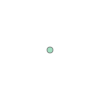

In [3]:
#Puntos:

p1 = Point(2.2, 4.2)
p2 = Point(7.2, 25.1)
p3 = Point(9.26, -2.456)

#Imprimiendo un punto
p1

In [4]:
#Las coordenadas de un punto
print('El punto 2 tiene como coordenadas x => {} || y => {} \n'.format(p2.x, p2.y))

#Imprimiendo directamente el punto
print('El punto directo ', p2)

El punto 2 tiene como coordenadas x => 7.2 || y => 25.1 

El punto directo  POINT (7.2 25.1)


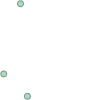

In [5]:
#Imprimiendo muchos puntos usando un MultiPoint

"""
El poner objetos (números, letras o puntos) entre [] crea un arreglo.
En este caso MultiPoint, que representa varios puntos, recibe un arreglo de objetos tipo Point.
"""
multipoint = MultiPoint([p1,p2,p3])
multipoint

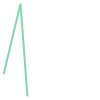

In [6]:
"""
En este caso también creamos una línea con una lista de puntos. También se podría instanciar como 
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
"""

line = LineString([p1,p2,p3])
line

In [7]:
#La longitud de una línea
print("Longitud de línea => ", line.length)

Longitud de línea =>  49.12265729007248


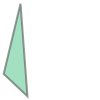

In [8]:
"""
Usando los 4 puntos, generamos un polígono con un arreglo
"""

poly = Polygon([p1,p2,p3])
poly

In [9]:
print('Area de polígono => ', poly.area)
print('Perímetro => ', poly.length)

Area de polígono =>  90.417
Perímetro =>  58.82554016064245


## Tablas de datos

Python cuenta con varias formas de manipular datos estructurados. La más popular son los dataframes de pandas. Estos permiten realizar operaciones como agrupaciones, filtrados, reestructurar, operaciones matemáticas ,además de realizar análisis exploratorio sobre conjuntos de datos. Admite los formatos:
* CSV
* Excel
* JSON
* Recuperar tablas a partir de búsquedas en SQL
* PKL
* HDF5
* Parquet

Sin embargo, no es posible realizar operaciones sobre las estructuras de datos geográficas vistas. Para ello, se requiere de un paquete que extiende las funciones de Pandas y las complementa con funciones para análisis geoespacial. Geopandas permite leer y escribir diferentes formatos de datos geoespaciales entre ellos:
* SHP
* GeoJSON
* Queries de PostGIS

Además podemos hacer funciones como las vistas anteriormente, calcular distancias entre puntos, aplicar funciones a los datos geoespaciales y realizar spatial joins. 

In [10]:
"""
Para no cargar archivos vamos a obtener los datos de dos URLs. Ambas librerías permiten hacer esto. Para el GeoDataframe usaremos un geojson y para el DataFrame usaremos un CSV
"""

polys = gd.read_file('http://data.insideairbnb.com/mexico/df/mexico-city/2021-03-22/visualisations/neighbourhoods.geojson')

data = pd.read_csv('http://data.insideairbnb.com/mexico/df/mexico-city/2021-03-22/visualisations/listings.csv')

In [11]:
polys

neighbourhood neighbourhood_group  \
0             Azcapotzalco                None   
1                 Coyoacán                None   
2    Cuajimalpa de Morelos                None   
3        Gustavo A. Madero                None   
4                Iztacalco                None   
5               Iztapalapa                None   
6   La Magdalena Contreras                None   
7               Milpa Alta                None   
8           Álvaro Obregón                None   
9                  Tláhuac                None   
10                 Tlalpan                None   
11              Xochimilco                None   
12           Benito Juárez                None   
13              Cuauhtémoc                None   
14          Miguel Hidalgo                None   
15     Venustiano Carranza                None   

                                             geometry  
0   MULTIPOLYGON (((-99.21002 19.51133, -99.20999 ...  
1   MULTIPOLYGON (((-99.12189 19.35698, -99.12188 ...  
2   MULTIPOLYGON (((-99.25738 19.40112, -99.25698 ...  
3   MULTIPOLYGON (((-99.09056 19.50955, -99.09053 ...  
4   MULTIPOLYGON (((-99.05751 19.40673, -99.05752 ...  
5   MULTIPOLYGON (((-99.12200 19.35766, -99.12200 ...  
6   MULTIPOLYGON (((-99.20819 19.33674, -99.20859 ...  
7   MULTIPOLYGON (((-99.00077 19.22699, -99.00075 ...  
8   MULTIPOLYGON (((-99.20556 19.30672, -99.20565 ...  
9   MULTIPOLYGON (((-99.00166 19.22618, -99.00195 ...  
10  MULTIPOLYGON (((-99.10103 19.30002, -99.10095 ...  
11  MULTIPOLYGON (((-99.10126 19.29628, -99.10122 ...  
12  MULTIPOLYGON (((-99.17046 19.35885, -99.17056 ...  
13  MULTIPOLYGON (((-99.12951 19.46265, -99.12919 ...  
14  MULTIPOLYGON (((-99.19067 19.46572, -99.19069 ...  
15  MULTIPOLYGON (((-99.10946 19.45292, -99.10895 ...

In [12]:
#dtypes es el tipo de dato de cada columna de la tabla. 

polys.dtypes

neighbourhood            object
neighbourhood_group      object
geometry               geometry
dtype: object

In [13]:
#Detalles de la proyección
polys.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

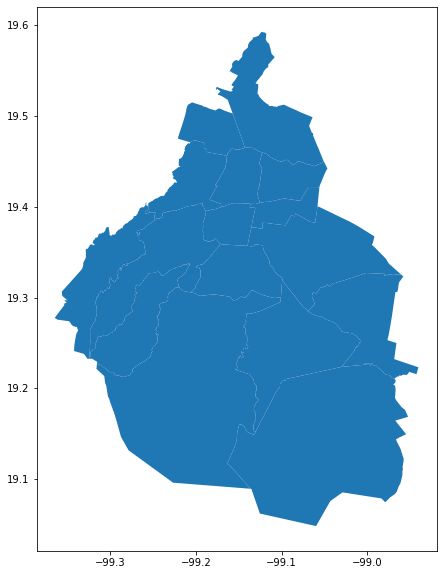

In [14]:
"""
GeoPandas permite mostrar los polígonos usando un método integrado.
"""

polys.plot(figsize=(10,10))

In [15]:
#Las tablas pueden ser filtradas por los valores de las columnas

polys[polys.neighbourhood == 'Benito Juárez']

neighbourhood neighbourhood_group  \
12  Benito Juárez                None   

                                             geometry  
12  MULTIPOLYGON (((-99.17046 19.35885, -99.17056 ...

<AxesSubplot:>

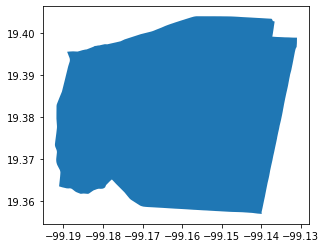

In [16]:
polys[polys.neighbourhood == 'Benito Juárez'].plot()

In [17]:
data.head(5)

id                                               name  host_id  \
0  35797                                        Villa Dante   153786   
1  44616                                  CONDESA HAUS  B&B   196253   
2  56074               Great space in historical San Rafael   265650   
3  58955                 Entire beautiful duplex in la Roma   282620   
4  61792  Spacious Clean Quiet room (own bath) in la Con...   299558   

                            host_name  neighbourhood_group  \
0                                Dici                  NaN   
1  Condesa Haus Bed & Breakfast  CDMX                  NaN   
2                               Maris                  NaN   
3                               Laura                  NaN   
4                             Roberto                  NaN   

           neighbourhood  latitude  longitude        room_type  price  \
0  Cuajimalpa de Morelos  19.38399  -99.27335  Entire home/apt   4116   
1             Cuauhtémoc  19.41006  -99.17645  Entire home/apt   9000   
2             Cuauhtémoc  19.43977  -99.15605  Entire home/apt    600   
3             Cuauhtémoc  19.42292  -99.15775  Entire home/apt   1479   
4             Cuauhtémoc  19.41259  -99.17959     Private room   1249   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  0         NaN                NaN   
1               1                 49  2020-10-25               0.43   
2               4                 56  2019-03-01               0.46   
3              15                 42  2020-01-31               0.37   
4               2                 52  2019-11-03               1.26   

   calculated_host_listings_count  availability_365  
0                               1               363  
1                              10               360  
2                               2               365  
3                               1               171  
4                               2               180

In [18]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [19]:
data.shape

(20021, 16)

In [20]:
data.groupby('neighbourhood')['neighbourhood'].count()

neighbourhood
Azcapotzalco               239
Benito Juárez             3097
Coyoacán                  1670
Cuajimalpa de Morelos      526
Cuauhtémoc                7578
Gustavo A. Madero          396
Iztacalco                  282
Iztapalapa                 295
La Magdalena Contreras     147
Miguel Hidalgo            3272
Milpa Alta                  23
Tlalpan                    870
Tláhuac                     49
Venustiano Carranza        456
Xochimilco                 148
Álvaro Obregón             973
Name: neighbourhood, dtype: int64

In [21]:
data.rename(columns={'neighbourhood':'delegacion'}, inplace=True)

<AxesSubplot:>

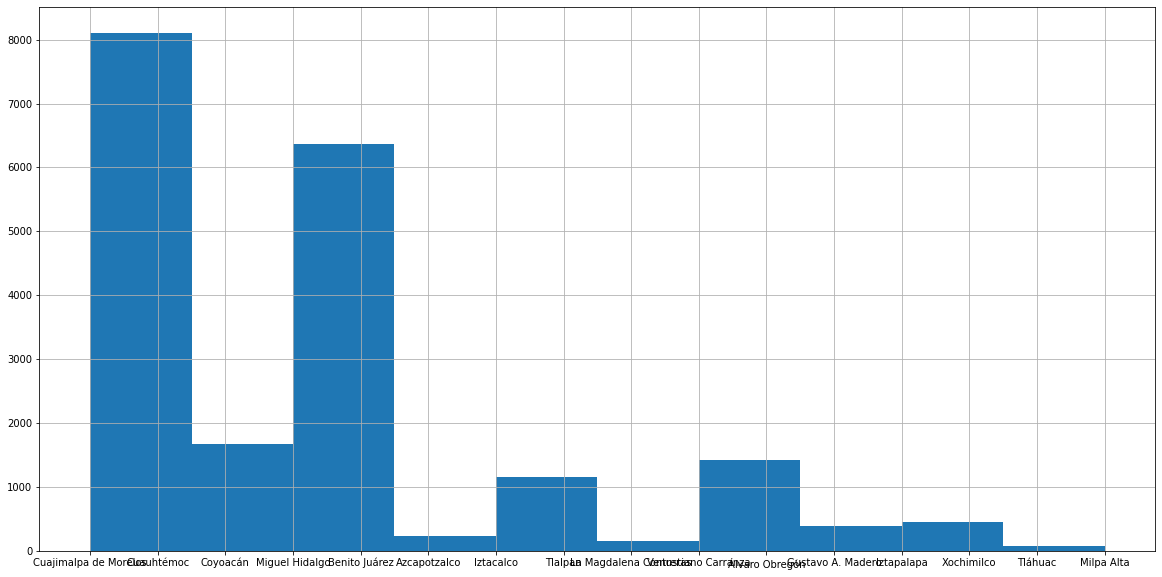

In [22]:
data['delegacion'].hist(figsize=(20,10))

In [23]:
fig = px.bar(data[data.delegacion == 'Benito Juárez'][0:50], x = 'price', y='name', color='room_type')
fig.show()

In [24]:
"""
También se pueden crear GeoDataframes a partir de Dataframes normales
"""

airbnbs = gd.GeoDataFrame(data, geometry=gd.points_from_xy(data.longitude, data.latitude))


#Configurando la proyección
airbnbs.set_crs(polys.crs, inplace=True)

id                                               name    host_id  \
0         35797                                        Villa Dante     153786   
1         44616                                  CONDESA HAUS  B&B     196253   
2         56074               Great space in historical San Rafael     265650   
3         58955                 Entire beautiful duplex in la Roma     282620   
4         61792  Spacious Clean Quiet room (own bath) in la Con...     299558   
...         ...                                                ...        ...   
20016  48788825                           Trendy Condesa Apartment   35478106   
20017  48789490  Cómoda recámara en depto. cerca de Parque Hundido   37740267   
20018  48789609                                 Luz de Luna - Room  393610995   
20019  48789791        Espaciosa, iluminada y equipada habitación.  339414303   
20020  48791743  Disfruta excelente DEPA 2 recamaras muebles nu...  293978335   

                                host_name  neighbourhood_group  \
0                                    Dici                  NaN   
1      Condesa Haus Bed & Breakfast  CDMX                  NaN   
2                                   Maris                  NaN   
3                                   Laura                  NaN   
4                                 Roberto                  NaN   
...                                   ...                  ...   
20016                             Saoirse                  NaN   
20017                             Gustavo                  NaN   
20018                       Miguel Adolfo                  NaN   
20019                             Armando                  NaN   
20020                                Eddy                  NaN   

                  delegacion  latitude  longitude        room_type  price  \
0      Cuajimalpa de Morelos  19.38399  -99.27335  Entire home/apt   4116   
1                 Cuauhtémoc  19.41006  -99.17645  Entire home/apt   9000   
2                 Cuauhtémoc  19.43977  -99.15605  Entire home/apt    600   
3                 Cuauhtémoc  19.42292  -99.15775  Entire home/apt   1479   
4                 Cuauhtémoc  19.41259  -99.17959     Private room   1249   
...                      ...       ...        ...              ...    ...   
20016             Cuauhtémoc  19.41661  -99.17030     Private room    700   
20017          Benito Juárez  19.37929  -99.19030     Private room    300   
20018             Iztapalapa  19.33339  -99.07819  Entire home/apt    240   
20019               Coyoacán  19.33187  -99.11794     Private room    168   
20020             Cuauhtémoc  19.43154  -99.16852  Entire home/apt   1040   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   1                  0         NaN                NaN   
1                   1                 49  2020-10-25               0.43   
2                   4                 56  2019-03-01               0.46   
3                  15                 42  2020-01-31               0.37   
4                   2                 52  2019-11-03               1.26   
...               ...                ...         ...                ...   
20016               2                  0         NaN                NaN   
20017               1                  0         NaN                NaN   
20018               2                  0         NaN                NaN   
20019               1                  0         NaN                NaN   
20020               2                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   1               363   
1                                  10               360   
2                                   2               365   
3                                   1               171   
4                                   2               180   
...                               ...               ...   
20016   

In [25]:
airbnbs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

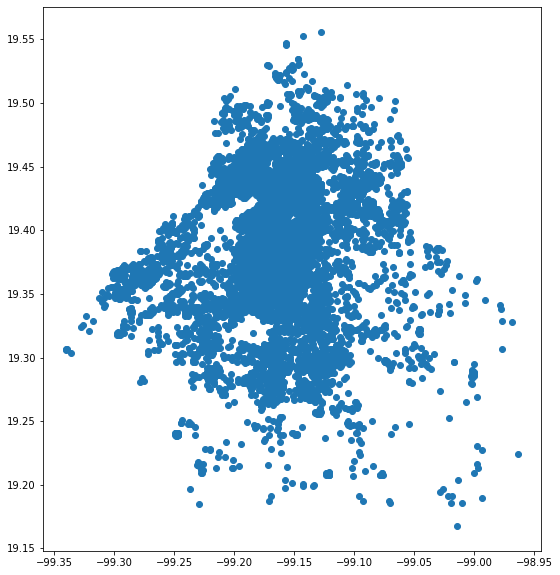

In [26]:
airbnbs.plot(figsize=(10,10))

In [27]:
"""
Mostrando solo los puntos dentro de Azcapotzalco
"""

mapa = px.scatter_mapbox(airbnbs, lat="latitude", lon="longitude", hover_name="name", hover_data=["room_type", "price"], color='delegacion',zoom=4, height=600, width=700)
mapa.update_layout(mapbox_style="open-street-map")
mapa.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
mapa.show()

## Operaciones geoespaciales

In [28]:
"""
Cambio de proyección de coordenadas a metros
"""

polys.to_crs(epsg=32614, inplace=True)
airbnbs.to_crs(epsg=32614, inplace=True)

In [29]:
#Calculando valores añadidos

polys['area'] = polys.geometry.area
polys['centroides'] = polys.centroid
polys.head(10)

neighbourhood neighbourhood_group  \
0            Azcapotzalco                None   
1                Coyoacán                None   
2   Cuajimalpa de Morelos                None   
3       Gustavo A. Madero                None   
4               Iztacalco                None   
5              Iztapalapa                None   
6  La Magdalena Contreras                None   
7              Milpa Alta                None   
8          Álvaro Obregón                None   
9                 Tláhuac                None   

                                            geometry          area  \
0  MULTIPOLYGON (((477963.564 2157420.273, 477967...  3.349636e+07   
1  MULTIPOLYGON (((487198.688 2140331.337, 487199...  5.387985e+07   
2  MULTIPOLYGON (((472976.702 2145231.623, 473018...  7.141351e+07   
3  MULTIPOLYGON (((490498.164 2157212.548, 490501...  8.783621e+07   
4  MULTIPOLYGON (((493962.041 2145833.230, 493960...  2.307706e+07   
5  MULTIPOLYGON (((487187.504 2140407.474, 487187...  1.130743e+08   
6  MULTIPOLYGON (((478132.021 2138100.273, 478090...  6.336937e+07   
7  MULTIPOLYGON (((499919.489 2125944.146, 499921...  2.980087e+08   
8  MULTIPOLYGON (((478405.270 2134778.383, 478395...  9.581948e+07   
9  MULTIPOLYGON (((499825.312 2125854.409, 499794...  8.578200e+07   

                       centroides  
0  POINT (480889.583 2154539.528)  
1  POINT (484204.025 2136980.001)  
2  POINT (467358.619 2136776.647)  
3  POINT (487843.216 2156606.143)  
4  POINT (490095.446 2144748.632)  
5  POINT (494034.578 2139463.743)  
6  POINT (471794.435 2130610.829)  
7  POINT (494626.050 2116258.548)  
8  POINT (474073.354 2138043.246)  
9  POINT (499703.865 2131476.777)

In [30]:
##Distancia de un polígono a otro
polys[polys.neighbourhood == 'Tláhuac'].geometry.values[0].distance(polys[polys.neighbourhood == 'Álvaro Obregón'].geometry.values[0])

12819.287920859644

In [31]:
polys['point_center_distance'] = polys.centroides.apply(lambda p: airbnbs.distance(p).max())

In [32]:
polys

neighbourhood neighbourhood_group  \
0             Azcapotzalco                None   
1                 Coyoacán                None   
2    Cuajimalpa de Morelos                None   
3        Gustavo A. Madero                None   
4                Iztacalco                None   
5               Iztapalapa                None   
6   La Magdalena Contreras                None   
7               Milpa Alta                None   
8           Álvaro Obregón                None   
9                  Tláhuac                None   
10                 Tlalpan                None   
11              Xochimilco                None   
12           Benito Juárez                None   
13              Cuauhtémoc                None   
14          Miguel Hidalgo                None   
15     Venustiano Carranza                None   

                                             geometry          area  \
0   MULTIPOLYGON (((477963.564 2157420.273, 477967...  3.349636e+07   
1   MULTIPOLYGON (((487198.688 2140331.337, 487199...  5.387985e+07   
2   MULTIPOLYGON (((472976.702 2145231.623, 473018...  7.141351e+07   
3   MULTIPOLYGON (((490498.164 2157212.548, 490501...  8.783621e+07   
4   MULTIPOLYGON (((493962.041 2145833.230, 493960...  2.307706e+07   
5   MULTIPOLYGON (((487187.504 2140407.474, 487187...  1.130743e+08   
6   MULTIPOLYGON (((478132.021 2138100.273, 478090...  6.336937e+07   
7   MULTIPOLYGON (((499919.489 2125944.146, 499921...  2.980087e+08   
8   MULTIPOLYGON (((478405.270 2134778.383, 478395...  9.581948e+07   
9   MULTIPOLYGON (((499825.312 2125854.409, 499794...  8.578200e+07   
10  MULTIPOLYGON (((489386.222 2134027.525, 489394...  3.142541e+08   
11  MULTIPOLYGON (((489361.711 2133613.592, 489365...  1.140256e+08   
12  MULTIPOLYGON (((482097.682 2140543.346, 482087...  2.668013e+07   
13  MULTIPOLYGON (((486406.982 2152025.060, 486440...  3.249899e+07   
14  MULTIPOLYGON (((479988.359 2152370.743, 479986...  4.635539e+07   
15  MULTIPOLYGON (((488510.765 2150946.718, 488564...  3.383643e+07   

                        centroides  point_center_distance  
0   POINT (480889.583 2154539.528)           39308.261932  
1   POINT (484204.025 2136980.001)           25473.804156  
2   POINT (467358.619 2136776.647)           38159.587973  
3   POINT (487843.216 2156606.143)           38718.660798  
4   POINT (490095.446 2144748.632)           27766.051342  
5   POINT (494034.578 2139463.743)           30195.734167  
6   POINT (471794.435 2130610.829)           35013.093924  
7   POINT (494626.050 2116258.548)           46776.985074  
8   POINT (474073.354 2138043.246)           32264.996540  
9   POINT (499703.865 2131476.777)           35638.990162  
10  POINT (478320.533 2122784.859)           40412.817232  
11  POINT (490503.010 2127954.849)           34607.558491  
12  POINT (483079.482 2142953.437)           28146.817281  
13  POINT (484352.661 2148565.727)           32419.686739  
14  POINT (478524.703 2148205.299)           35046.099411  
15  POINT (490226.053 2148464.610)           30697.371172

In [33]:
temp = polys[polys.neighbourhood == 'Benito Juárez']
temp

neighbourhood neighbourhood_group  \
12  Benito Juárez                None   

                                             geometry          area  \
12  MULTIPOLYGON (((482097.682 2140543.346, 482087...  2.668013e+07   

                        centroides  point_center_distance  
12  POINT (483079.482 2142953.437)           28146.817281

In [34]:
res = gd.sjoin(airbnbs, temp, op='within', how = 'inner')
res

id                                               name    host_id  \
10       171109                    Cool room near WTC and Metrobus     816295   
27       291804                    A nice room with great location    1511568   
29       312773                Perfect parkfront apt full of light    1608293   
46       382904                 Cute Sofa Bed in South Mexico City    1915348   
50       422159                    Nice Studio, 50 mts of terrace.    2099653   
...         ...                                                ...        ...   
19983  48734453            Comfortable and perfect for Home Office   21941749   
19986  48735806                      Tranquila y bonita habitación   90438332   
20003  48771737             Cómodo, amplio y céntrico departamento  134680050   
20006  48774371  Spacious & fully loaded apartment. Great locat...   73653575   
20017  48789490  Cómoda recámara en depto. cerca de Parque Hundido   37740267   

          host_name  neighbourhood_group_left     delegacion  latitude  \
10           Carlos                       NaN  Benito Juárez  19.39549   
27     Luis Ernesto                       NaN  Benito Juárez  19.36294   
29           Mariel                       NaN  Benito Juárez  19.40042   
46         Lucrecia                       NaN  Benito Juárez  19.36905   
50              NaN                       NaN  Benito Juárez  19.38942   
...             ...                       ...            ...       ...   
19983         Karla                       NaN  Benito Juárez  19.39467   
19986         Grise                       NaN  Benito Juárez  19.36395   
20003     Guadalupe                       NaN  Benito Juárez  19.39003   
20006      Gabriela                       NaN  Benito Juárez  19.37960   
20017       Gustavo                       NaN  Benito Juárez  19.37929   

       longitude        room_type  price  ...  reviews_per_month  \
10     -99.17616     Private room    250  ...               0.83   
27     -99.15415     Private room    618  ...                NaN   
29     -99.14807  Entire home/apt   1441  ...               0.32   
46     -99.18303      Shared room   1030  ...                NaN   
50     -99.13580     Private room    360  ...               0.21   
...          ...              ...    ...  ...                ...   
19983  -99.17706  Entire home/apt    900  ...                NaN   
19986  -99.16101     Private room    400  ...                NaN   
20003  -99.16377  Entire home/apt    509  ...                NaN   
20006  -99.19100  Entire home/apt    690  ...               1.00   
20017  -99.19030     Private room    300  ...                NaN   

       calculated_host_listings_count availability_365  \
10                                  2              363   
27                                  1              365   
29                                  2               31   
46                                  1                0   
50                                  5              363   
...                               ...              ...   
19983                               6               61   
19986                               1              363   
20003                               2              359   
20006                               1              341   
20017                               1               88   

                             geometry  index_right  neighbourhood  \
10     POINT (481503.399 2144597.930)           12  Benito Juárez   
27     POINT (483811.213 2140993.973)           12  Benito Juárez   
29     POINT (484453.291 2145140.678)           12  Benito Juárez   
46     POINT (480778.953 2141673.020)           12  Benito Juárez   
50     POINT (485740.632 2143922.437)           12  Benito Juárez   
...                               ...          ...            ...   
19983  POINT (481408.807 2144507.292)           12  Benito Juárez   
19986  POINT (483090.881 2141106.389)           12  Benito Juárez   
20003  POINT (48

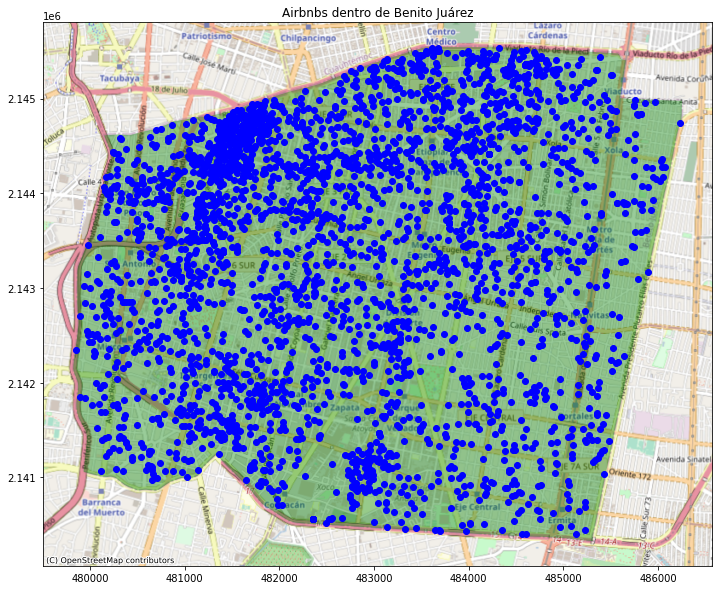

In [35]:
f, ax = plt.subplots(1, figsize=(12,12))
#Desplegamos el polígono que filtramos
temp['geometry'].plot(ax = ax,alpha=0.4,color = 'green')

#desplegamos los puntos de airbnb que están dentro
res.plot(ax=ax,color="blue")
ax.set_title('Airbnbs dentro de Benito Juárez')
cx.add_basemap(ax, crs=temp.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
plt.show()

## Un poco más de integración

In [36]:
lugar = 'Centro, Veracruz, México'
graph = ox.graph_from_place(lugar)

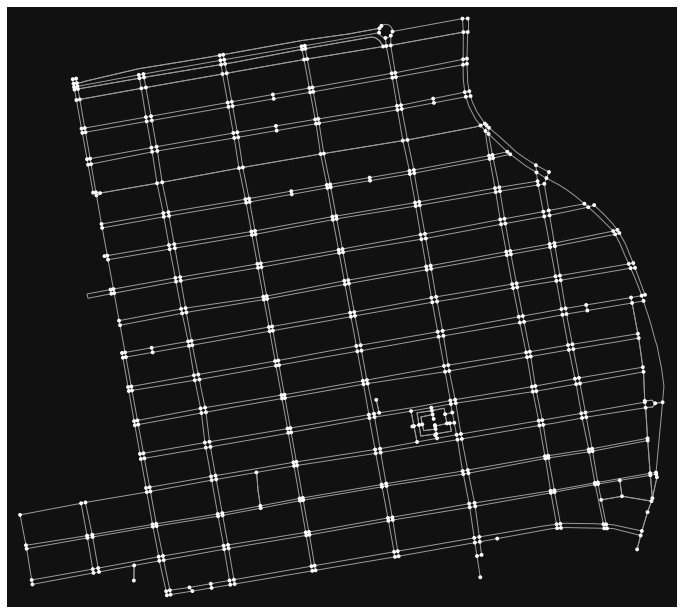

In [37]:
fig, ax = ox.plot_graph(graph, figsize=(12,12))
plt.show()

In [38]:
nodes, edges = ox.graph_to_gdfs(graph)

In [39]:
nodes.head()

y          x  street_count                    geometry
osmid                                                                    
290308294  18.151819 -94.411970             3  POINT (-94.41197 18.15182)
290308301  18.154272 -94.415199             3  POINT (-94.41520 18.15427)
317324307  18.147017 -94.415937             4  POINT (-94.41594 18.14702)
609081633  18.156772 -94.415794             3  POINT (-94.41579 18.15677)
609081721  18.156602 -94.417791             3  POINT (-94.41779 18.15660)

In [40]:
edges.head()

osmid  oneway  \
u         v          key                      
290308294 2942305034 0    880882371    True   
          668949292  0     69342327    True   
290308301 668949286  0    272085920    True   
          8193890901 0    880975158    True   
317324307 1279593548 0     26392097    True   

                                                        name      highway  \
u         v          key                                                    
290308294 2942305034 0                    Avenida Díaz Mirón  residential   
          668949292  0        Boulevard Manuel Ávila Camacho     tertiary   
290308301 668949286  0        Boulevard Manuel Ávila Camacho     tertiary   
          8193890901 0    Avenida José María Morelos y Pavón  residential   
317324307 1279593548 0                Calle Ignacio Zaragoza    secondary   

                          length  \
u         v          key           
290308294 2942305034 0    11.402   
          668949292  0    88.789   
290308301 668949286  0     6.131   
          8193890901 0    15.237   
317324307 1279593548 0    51.925   

                                                                   geometry  \
u         v          key                                                      
290308294 2942305034 0    LINESTRING (-94.41197 18.15182, -94.41207 18.1...   
          668949292  0    LINESTRING (-94.41197 18.15182, -94.41209 18.1...   
290308301 668949286  0    LINESTRING (-94.41520 18.15427, -94.41524 18.1...   
          8193890901 0    LINESTRING (-94.41520 18.15427, -94.41522 18.1...   
317324307 1279593548 0    LINESTRING (-94.41594 18.14702, -94.41642 18.1...   

                              ref junction maxspeed  
u         v          key                             
290308294 2942305034 0        NaN      NaN      NaN  
          668949292  0        NaN      NaN      NaN  
290308301 668949286  0        NaN      NaN      NaN  
          8193890901 0        NaN      NaN      NaN  
317324307 1279593548 0    MEX 180      NaN      NaN